# Import Module & inisiasi data

In [191]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statistics

In [3]:
from google.colab import files
uploaded = files.upload()

Saving melb_data.csv to melb_data.csv


In [14]:
#inisiasi data
data = pd.read_csv('melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [155]:
df = data.dropna()
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

# 1.Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait:
*   Titik Pusat Data (Central Tendency
*   Persebaran Data (Dispersion)
*   Distribusi Data (Distribution)

Landsize

Berdasarkan analisa yang telah dilakukan diketahui bahwa rata-rata dari data landsize adalah sebesar 471.006 dengann nilai tengah 373 dan modus 0. Dikarenakan nilai median yang lebih kecil dari nilai rata-rata maka dapat disimpulkan bahwa data landsize memiliki karakteristik right skeweness. Hal ini juga dapat dilihat dari bentuk histogram yang landai ke arah kanan.

Titik Pusat Data
Rata-rata Landsize =  471.00693996126535
Median Landsize =  373.0
Modus Landsize =  0.0

Titik Persebaran Data
1st Quartile =  152.0
2nd Quartile =  373.0
3rd Quartile =  628.0

Distribusi data


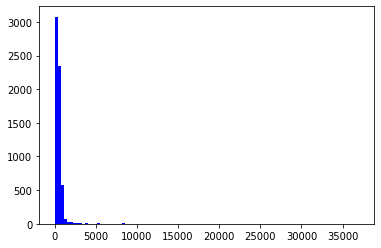

In [163]:
#Analisa data untuk landsize
print('Titik Pusat Data')
df_land = df ['Landsize'].sort_values()
df_land_desc = df_land.describe()
df_land_desc.loc['mode'] = statistics.mode(df_land)
print('Rata-rata Landsize = ',df_land_desc['mean'])
print('Median Landsize = ',df_land_desc['50%'])
df_land_mode_value = pd.DataFrame(df_land.value_counts())
print('Modus Landsize = ',df_land_desc['mode'])
print()
print('Titik Persebaran Data')
print('1st Quartile = ',df_land_desc['25%'])
print('2nd Quartile = ',df_land_desc['50%'])
print('3rd Quartile = ',df_land_desc['75%'])
print()
print('Distribusi data')
fig,ax = plt.subplots()
ax.hist(df['Landsize'],bins=100,color='blue')
plt.show()

**Price**

Berdasarkan analisa yang telah dilakukan diketahui bahwa rata-rata dari data price adalah sebesar 1,068,828.202 dengann nilai tengah 88,000 dan modus 60,000. Dikarenakan nilai median yang lebih kecil dari nilai rata-rata maka dapat disimpulkan bahwa data price memiliki karakteristik right skeweness. Hal ini juga dapat dilihat dari bentuk histogram yang landai ke arah kanan.  

Titik Pusat Data
Rata-rata Price =  1068828.202065849
Median Price =  880000.0
Modus Price =  600000.0

Titik Persebaran Data
1st Quartile =  620000.0
2nd Quartile =  880000.0
3rd Quartile =  1325000.0

Distribusi data


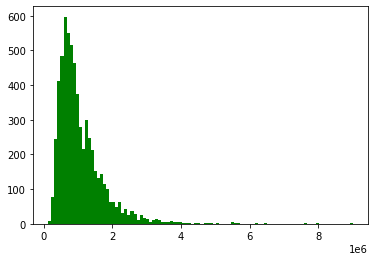

In [165]:
#Analisa data untuk price
print('Titik Pusat Data')
df_price = df ['Price'].sort_values()
df_price_desc = df_price.describe()
df_price_desc.loc['mode'] = statistics.mode(df_price)
print('Rata-rata Price = ',df_price_desc['mean'])
print('Median Price = ',df_price_desc['50%'])
df_price_mode_value = pd.DataFrame(df_price.value_counts())
print('Modus Price = ',df_price_desc['mode'])
print()
print('Titik Persebaran Data')
print('1st Quartile = ',df_price_desc['25%'])
print('2nd Quartile = ',df_price_desc['50%'])
print('3rd Quartile = ',df_price_desc['75%'])
print()
print('Distribusi data')
fig,ax = plt.subplots()
ax.hist(df['Price'],bins=100,color='green')
plt.show()

# 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

Total data distance yang outliers untuk semua region sebanyak 204 data

Region dengan data Distance yang outlier adalah:
South-Eastern Metropolitan    85
Eastern Metropolitan          45
Eastern Victoria              23
Northern Victoria             17
Western Metropolitan          16
Western Victoria              14
Northern Metropolitan          4
Name: Regionname, dtype: int64


<function matplotlib.pyplot.show>

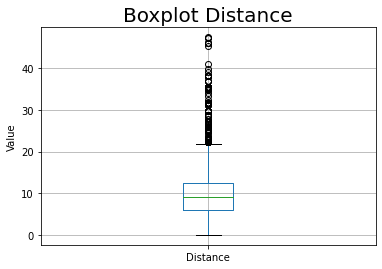

In [166]:
q1 = df['Distance'].quantile(0.25)
q3 = df['Distance'].quantile(0.75)
iqr = q3 - q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
outliers = df[(df['Distance']>upper) | (df['Distance']<lower)]
print('Total data distance yang outliers untuk semua region sebanyak',outliers.Regionname.count(),'data')
print()
print('Region dengan data Distance yang outlier adalah:')
print(outliers.Regionname.value_counts())
df.boxplot(column ='Distance')
plt.title('Boxplot Distance', size = 20)
plt.ylabel('Value', size = 10)
plt.show

Berdasarkan analisa yang dilakukan, diketahui bahwa terdapat 7 region dengan data distance yang outliers. Dengan kata lain, 7 region ini memiliki jarak yang cukup jauh dari CBD. Untuk masyarakat dengan tingkat mobilitas yang tinggi ke CBD, disarankan untuk membeli rumah di southern metropolitan. Hal ini dikarenakan hanya southern metropolitan yang tidak memiliki data outliers.

# 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

1970.0    602
1960.0    552
1950.0    455
1900.0    270
1930.0    232
Name: YearBuilt, dtype: int64


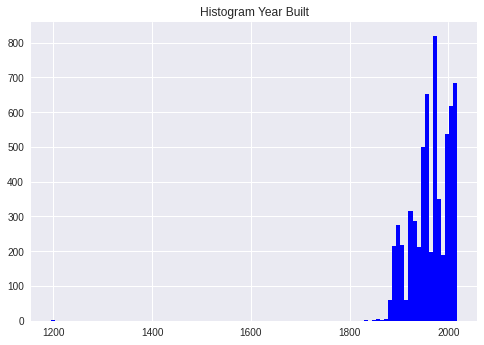

In [232]:
#Analisa Data
count_rumah = df['YearBuilt'].value_counts()
print(count_rumah.head())
plt.style.use('seaborn')
fig,ax =plt.subplots()
ax.hist(df['YearBuilt'],bins=100,color='blue')
plt.title('Histogram Year Built')
plt.show()

Berdasarkan pengolahan data yang telah dilakukan, diketahui bahwa pada tahun 1970 banyak rumah yang sudah selesai dibangun. 

# 4. Tampilkan perkembangan rata-rata harga (Price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

       YearBuilt      Price
12094     1960.0  9000000.0
      YearBuilt     Price
1805     1920.0  131000.0


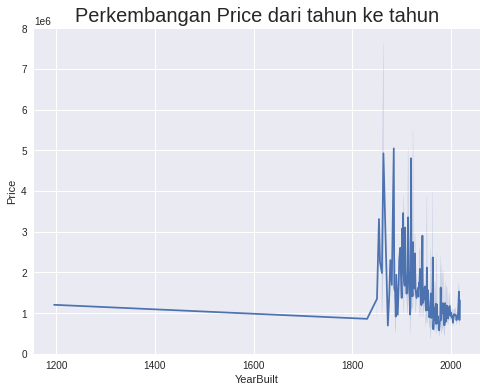

In [241]:
print(df[['YearBuilt','Price']].loc[df['Price']== df['Price'].max()])
print(df[['YearBuilt','Price']].loc[df['Price']== df['Price'].min()])
plt.figure(figsize = (8,6))
sns.lineplot(x = df['YearBuilt'], y = df['Price'])
plt.title('Perkembangan Price dari tahun ke tahun',size = 20)
plt.show()

Berdasarkan pengolahan data yang telah dilakukan, dapat diketahui bahwa price dari tahun ketahun mengalami peningkatan serta penurunan. Harga rumah tertinggi yaitu sebesar 900,000 pada tahun 1960. Sedangkan, harga rumah terendah yaitu sebesar 131,000 pada tahun 1920. Dapat dilihat pada awal tahun 2000 harga rumah mulai mengalami penurunan yang cukup drastis. Peristiwa Y2K mungkin memiliki peran dalam penurunan harga rumah, kemampuan finansial yang berkurang menyebabkan para developer menurunkan harga rumah untuk meningkatkan daya beli.

# 5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

NormaltestResult(statistic=3522.3809188140385, pvalue=0.0)
NormaltestResult(statistic=13309.56639382275, pvalue=0.0)
NormaltestResult(statistic=2376.577754887771, pvalue=0.0)
NormaltestResult(statistic=139.54392596422878, pvalue=4.993688927652792e-31)
Spearman correlation Price vs Landsize: 0.365473
Spearman correlation Price vs Distance: -0.117274
Spearman correlation Price vs Rooms: 0.591448


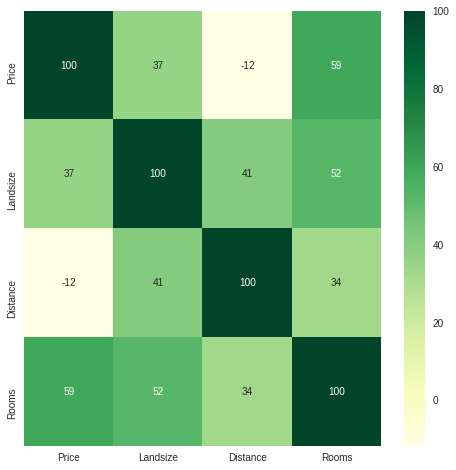

In [201]:
print(stats.normaltest(df['Price']))
print(stats.normaltest(df['Landsize']))
print(stats.normaltest(df['Distance']))
print(stats.normaltest(df['Rooms']))
corr_land,_ = spearmanr(df['Price'],df['Landsize'])
corr_dist,_ = spearmanr(df['Price'],df['Distance'])
corr_rooms,_ = spearmanr(df['Price'],df['Rooms'])
print('Spearman correlation Price vs Landsize: %3f' %corr_land)
print('Spearman correlation Price vs Distance: %3f' %corr_dist)
print('Spearman correlation Price vs Rooms: %3f' %corr_rooms)
plt.figure(figsize=(8,8))
corr = df[['Price','Landsize','Distance','Rooms']].corr(method = 'spearman')
sns.heatmap(corr*100, cmap="YlGn", annot= True, fmt=".0f")
plt.show()

Berdasarkan pengolahan data yang sudah dilakukan diketahui bahwa data price,rooms,landsize dan rooms berdistribusi tidak normal. Oleh karena itu untuk menentukan korelasi antar variable akan menggunakan metode spearman. Diketahui bahwa korelasi terbesar adalah rooms dan price. Nilai korelasi kedua variable ini bernilai positif. Oleh karena itu dapat disimpulkan bahwa semakin banyak jumlah ruangan maka harga akan semakin tinggi. Melihat trend harga yang semakin turun selama 5 tahun terakhir, maka dapat diasumsikan jumlah ruangan yang ditawarkan pun tidak sebanyak tahun 1960an (dimana harga rumah sedang tinggi-tingginya). Oleh karena itu untuk meningkatkan minat konsumen, developer sebaiknya mendesign ruangan-ruangan yang bersifat modular. Meski jumlahnya sedikit namun dapat digunakan untuk berbagai aktivitas.

# 6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah : 

Barplot untuk Region Name vs Price

                   Regionname         Price
0       Southern Metropolitan  1.378654e+06
1        Eastern Metropolitan  1.110341e+06
2  South-Eastern Metropolitan  9.304847e+05
3       Northern Metropolitan  8.722635e+05
4        Western Metropolitan  8.675011e+05
5            Eastern Victoria  6.699992e+05
6           Northern Victoria  5.568947e+05
7            Western Victoria  3.910714e+05


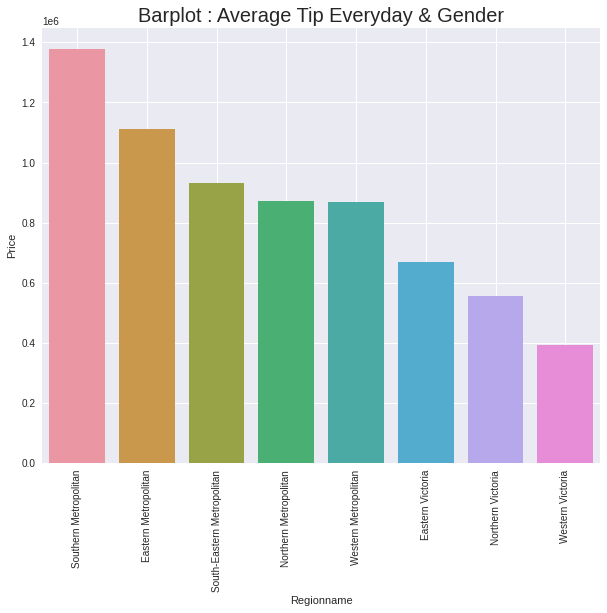

In [215]:
df_mean = df[['Regionname','Price']].groupby(by='Regionname').mean().sort_values(by='Price',ascending=False)
df_mean = df_mean.reset_index()
print(df_mean)
plt.figure(figsize=(10,8))
sns.barplot(data=df_mean, x='Regionname',y='Price')
plt.title('Barplot : Average Tip Everyday & Gender',size = 20)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi

In [219]:
df_mean_max = df[df['Regionname']=='Southern Metropolitan']
df_max_council = df_mean_max[['CouncilArea','Price']].groupby(by='CouncilArea').mean().sort_values(by='Price',ascending=False)
df_max_council.head(5)

,Price
CouncilArea,
Boroondara,1.743578e+06
Bayside,1.701974e+06
Whitehorse,1.402118e+06
Stonnington,1.390313e+06
Port Phillip,1.142609e+06


Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!

In [223]:
df_max_type = df_mean_max[['Type','Price']].groupby(by='Type').mean().sort_values(by='Price',ascending=False)
df_max_type

,Price
Type,
h,1.861504e+06
t,1.160534e+06
u,6.447187e+05


Metode penjualan properti (Method) yang paling sering dilakukan!

In [225]:
df_mode_method = df_mean_max['Method'].mode()
df_mode_method

0    S
dtype: object

Berdasarkan pengolahan data yang dilakukan, diketahui bahwa rata-rata harga rumah paling tinggi terdapat di Southern Metropolitan. Berhubungan dengan poin nomor 2, Southern Mtropolitan memiliki jarak terdekat ke CBD. Hal ini merupakan salah satu nilai plus, sehingga developer memutuskan untuk memasang harga paling tinggi di daerah Southern Metropolitan.Apabila masyarakat ingin memiliki rumah di southern metropolitan namun memiliki keterbatasan biaya maka dapat memilih rumah dengan tipe U, unit/duplex